## Data description ##


X-variable:

1.   Cement (component 1)(kg in a m^3 mixture)
2.   Blast Furnace Slag (component 2)(kg in a m^3 mixture)
3. Fly Ash (component 3)(kg in a m^3 mixture)
4. Water  (component 4)(kg in a m^3 mixture)
5. Superplasticizer (component 5)(kg in a m^3 mixture)
6. Coarse Aggregate  (component 6)(kg in a m^3 mixture)
7. Fine Aggregate (component 7)(kg in a m^3 mixture)
8. Age (day)

Y-variable:
Concrete compressive strength(MPa, megapascals)



In [ ]:
import pandas as pd

# Load the data files
df = pd.read_csv('Concrete_dataset.csv')
df.head()


,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
0,540.0,0.0,0.0,162.0,2.5,1040.0,676.0,28,79.986111
1,540.0,0.0,0.0,162.0,2.5,1055.0,676.0,28,61.887366
2,332.5,142.5,0.0,228.0,0.0,932.0,594.0,270,40.269535
3,332.5,142.5,0.0,228.0,0.0,932.0,594.0,365,41.052780
4,198.6,132.4,0.0,192.0,0.0,978.4,825.5,360,44.296075


## Discovering null values

In [ ]:
df.isnull().sum()

Cement                           0
Blast Furnace Slag               0
Fly Ash                          0
Water                            0
Superplasticizer                 0
Coarse Aggregate                 0
Fine Aggregate                   0
Age (day)                        0
Concrete compressive strength    0
dtype: int64

## Discovering duplicates

In [ ]:
df[df.duplicated(keep=False)]

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength


In [ ]:
df = df.drop_duplicates()

### Import libraries


In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import scipy.stats as stats
from statsmodels.stats.outliers_influence import variance_inflation_factor
from statsmodels.tools.tools import add_constant
import statsmodels.api as sm

# 1. Preview dataset



##1.1   dimension of data & types of data


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1005 entries, 0 to 1004
Data columns (total 9 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   Cement                         1005 non-null   float64
 1   Blast Furnace Slag             1005 non-null   float64
 2   Fly Ash                        1005 non-null   float64
 3   Water                          1005 non-null   float64
 4   Superplasticizer               1005 non-null   float64
 5   Coarse Aggregate               1005 non-null   float64
 6   Fine Aggregate                 1005 non-null   float64
 7   Age (day)                      1005 non-null   int64  
 8   Concrete compressive strength  1005 non-null   float64
dtypes: float64(8), int64(1)
memory usage: 70.8 KB


##1.2 Statistics of data

In [ ]:
df.describe()

,Cement,Blast Furnace Slag,Fly Ash,Water,Superplasticizer,Coarse Aggregate,Fine Aggregate,Age (day),Concrete compressive strength
count,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000,1005.000000
mean,278.629055,72.043134,55.535075,182.074378,6.031647,974.376468,772.686617,45.856716,35.250273
std,104.345003,86.170555,64.207448,21.340740,5.919559,77.579534,80.339851,63.734692,16.284808
min,102.000000,0.000000,0.000000,121.750000,0.000000,801.000000,594.000000,1.000000,2.331808
25%,190.680000,0.000000,0.000000,166.610000,0.000000,932.000000,724.300000,7.000000,23.523542
50%,265.000000,20.000000,0.000000,185.700000,6.100000,968.000000,780.000000,28.000000,33.798114
75%,349.000000,142.500000,118.270000,192.940000,10.000000,1031.000000,822.200000,56.000000,44.868340
max,540.000000,359.400000,200.100000,247.000000,32.200000,1145.000000,992.600000,365.000000,82.599225


# 2. EDA

##2.1 Distribution of data


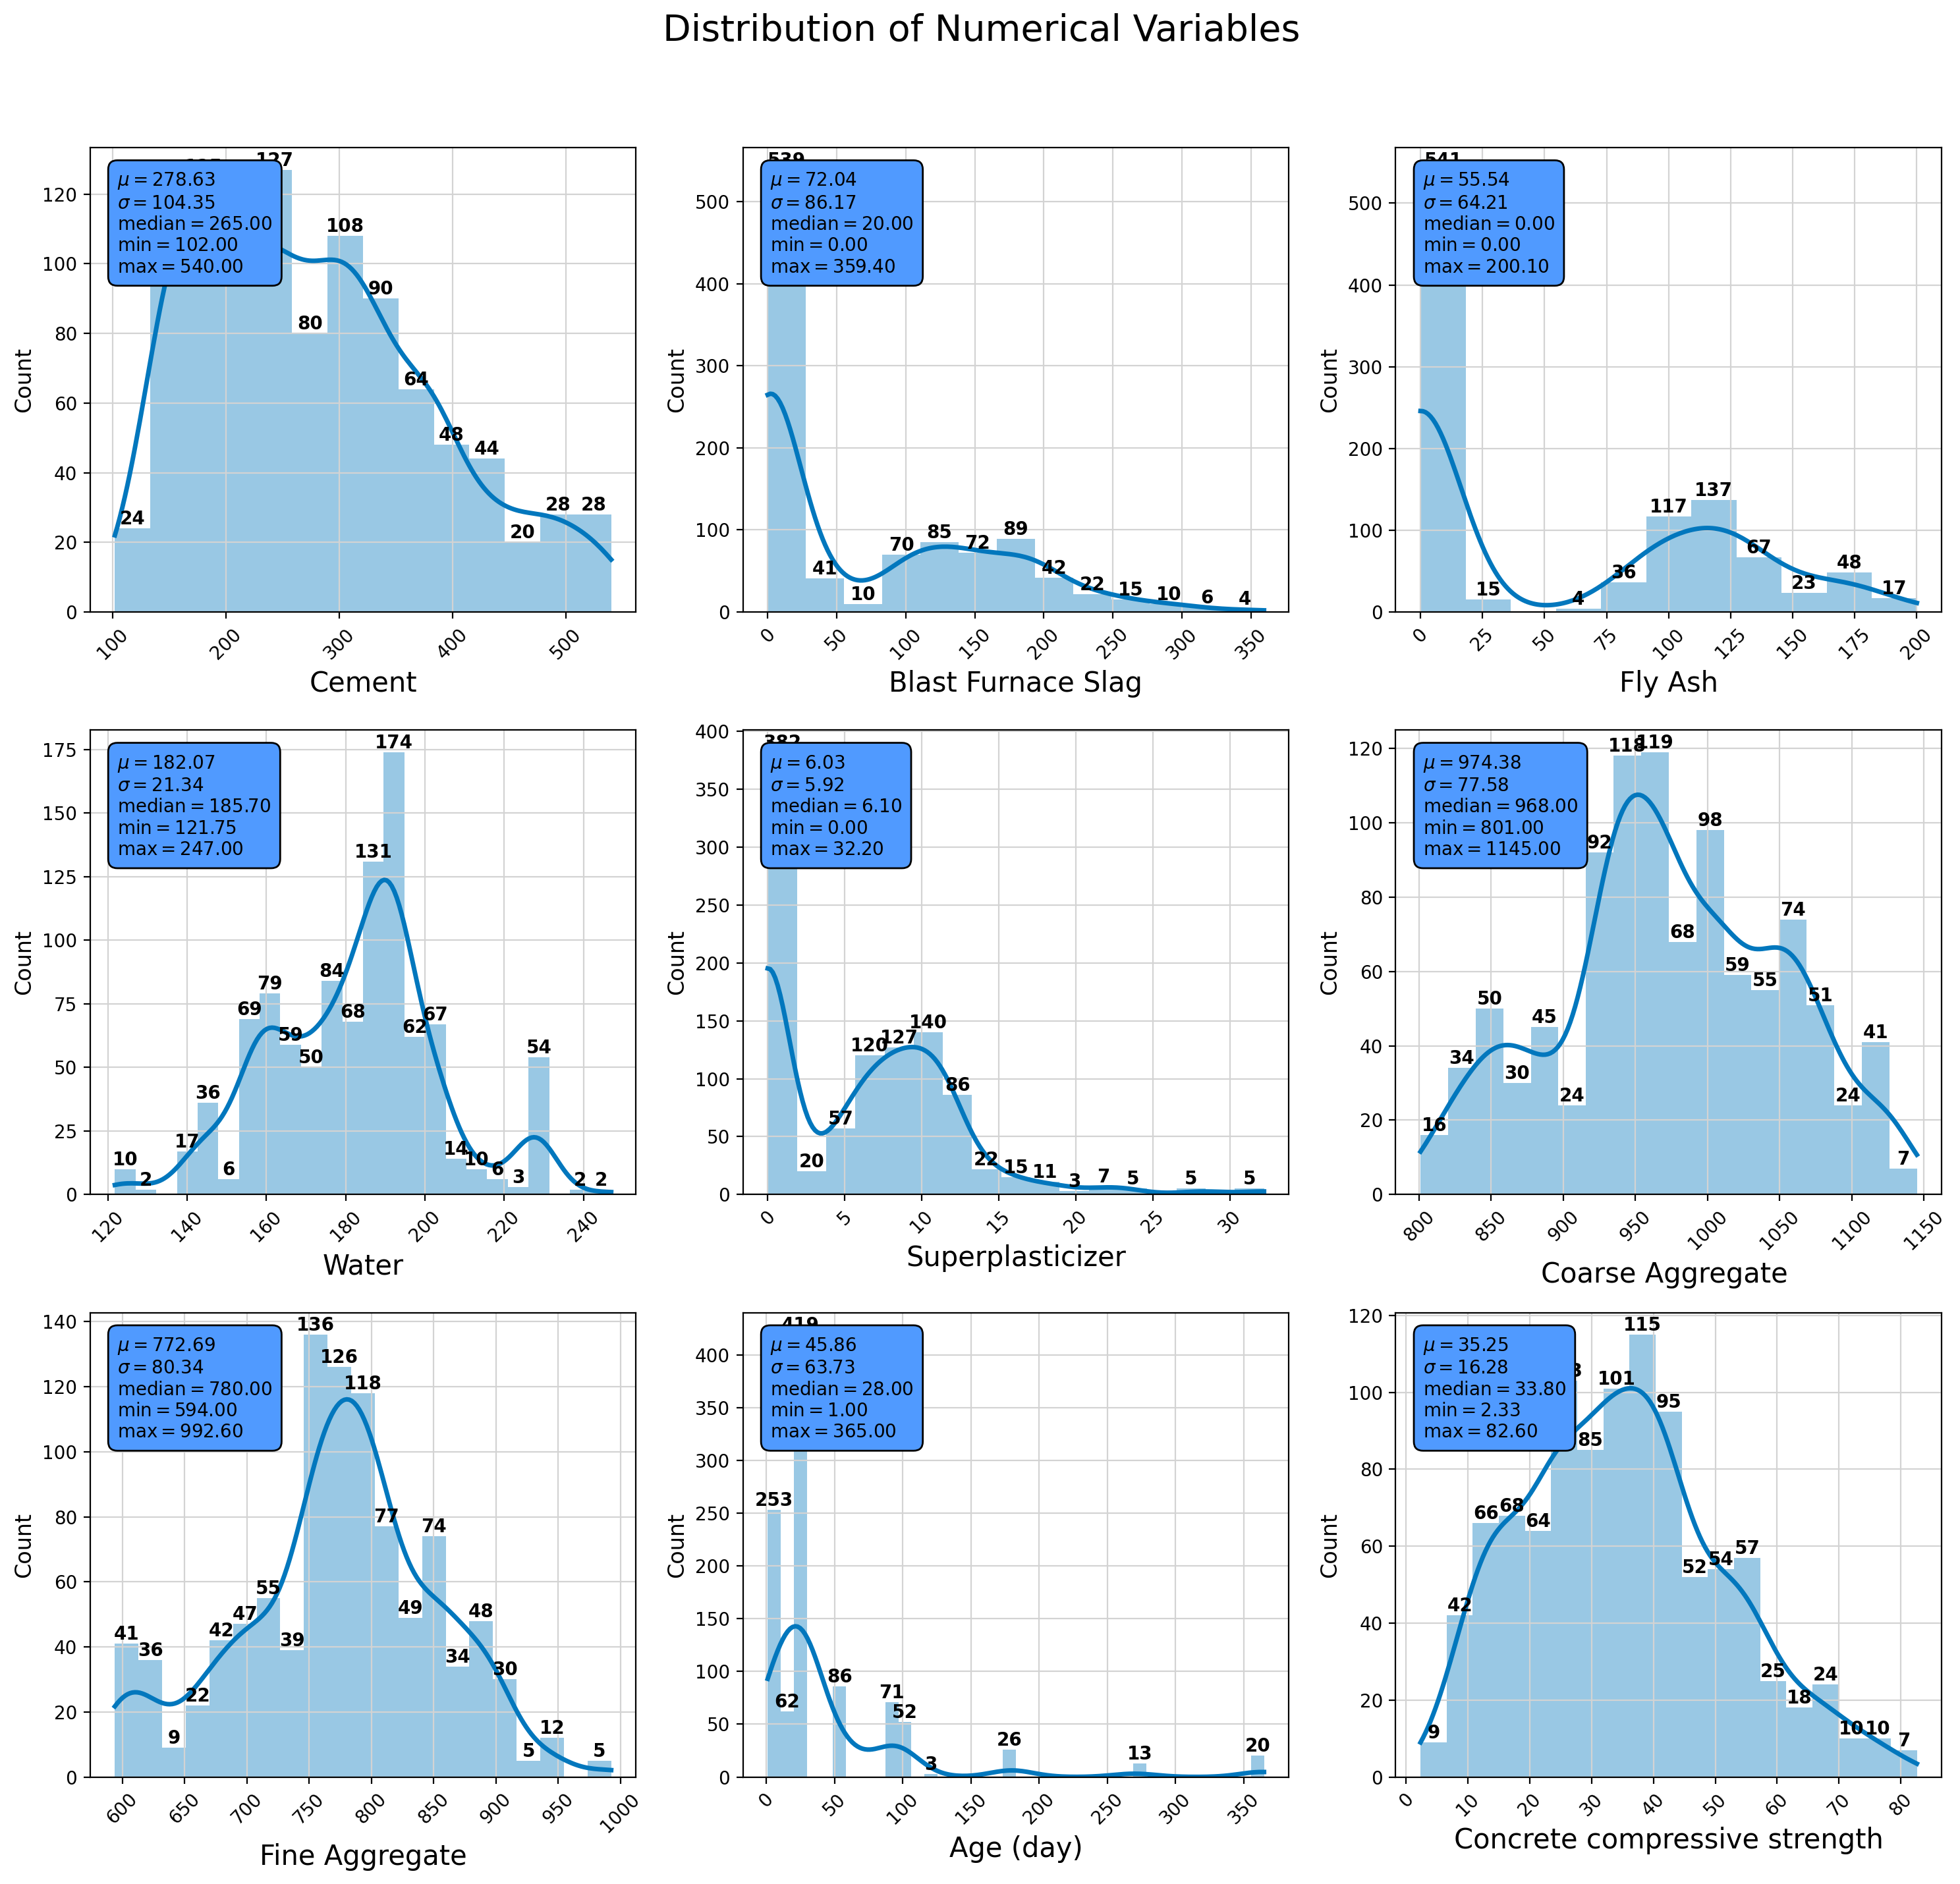

In [ ]:
NumCols_clean = df.select_dtypes(include=np.number).columns
# Calculate the required number of rows and columns for the subplot grid
num_columns_clean = len(NumCols_clean)
num_rows_clean = num_columns_clean // 3 + (num_columns_clean % 3 > 0)  # Ensure we have enough rows

fig, ax = plt.subplots(nrows=num_rows_clean, ncols=3, figsize=(15, num_rows_clean * 5), dpi=200)  # Adjust figure size based on rows

for i in range(len(NumCols_clean)):
    row = i // 3
    col = i % 3
    graph = sns.histplot(data=df, x=NumCols_clean[i], kde=True, ax=ax[row, col] if num_rows_clean > 1 else ax[col],
                         edgecolor='none',  alpha=0.4, line_kws={'lw': 2.5},color = '#0277bd')
    ax[row, col if num_rows_clean > 1 else col].set_xlabel(NumCols_clean[i], fontsize=15)
    ax[row, col if num_rows_clean > 1 else col].set_ylabel('Count', fontsize=12)
    ax[row, col if num_rows_clean > 1 else col].tick_params(axis='x', rotation=45)
    ax[row, col if num_rows_clean > 1 else col].grid(color='lightgrey')

    # Adjusting annotation to avoid overlap and ensure visibility
    for j, p in enumerate(graph.patches):
        height = p.get_height()
        if height > 0:  # Annotating non-zero bars
            ax[row, col if num_rows_clean > 1 else col].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                                  ha='center', fontsize=10, fontweight="bold", verticalalignment='bottom')

    # Adding summary statistics text box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[NumCols_clean[i]].mean(),
        r'$\sigma=%.2f$' % df[NumCols_clean[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(df[NumCols_clean[i]]),
        r'$\mathrm{min}=%.2f$' % df[NumCols_clean[i]].min(),
        r'$\mathrm{max}=%.2f$' % df[NumCols_clean[i]].max()
    ))
    ax[row, col if num_rows_clean > 1 else col].text(0.05, 0.95, textstr, transform=ax[row, col if num_rows_clean > 1 else col].transAxes, fontsize=10,
                      verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#509aff',
                                                         edgecolor='black', pad=0.5))

# Adjust for an uneven number of plots
if len(NumCols_clean) % 3:
    for i in range(3 - len(NumCols_clean) % 3):  # Turn off remaining axes in the last row
        ax[num_rows_clean-1, 2 - i if num_rows_clean > 1 else 2 - i].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.savefig('Distribution of Numerical Variables.png', dpi=300)
plt.show()


## 2.2 Outlier detection

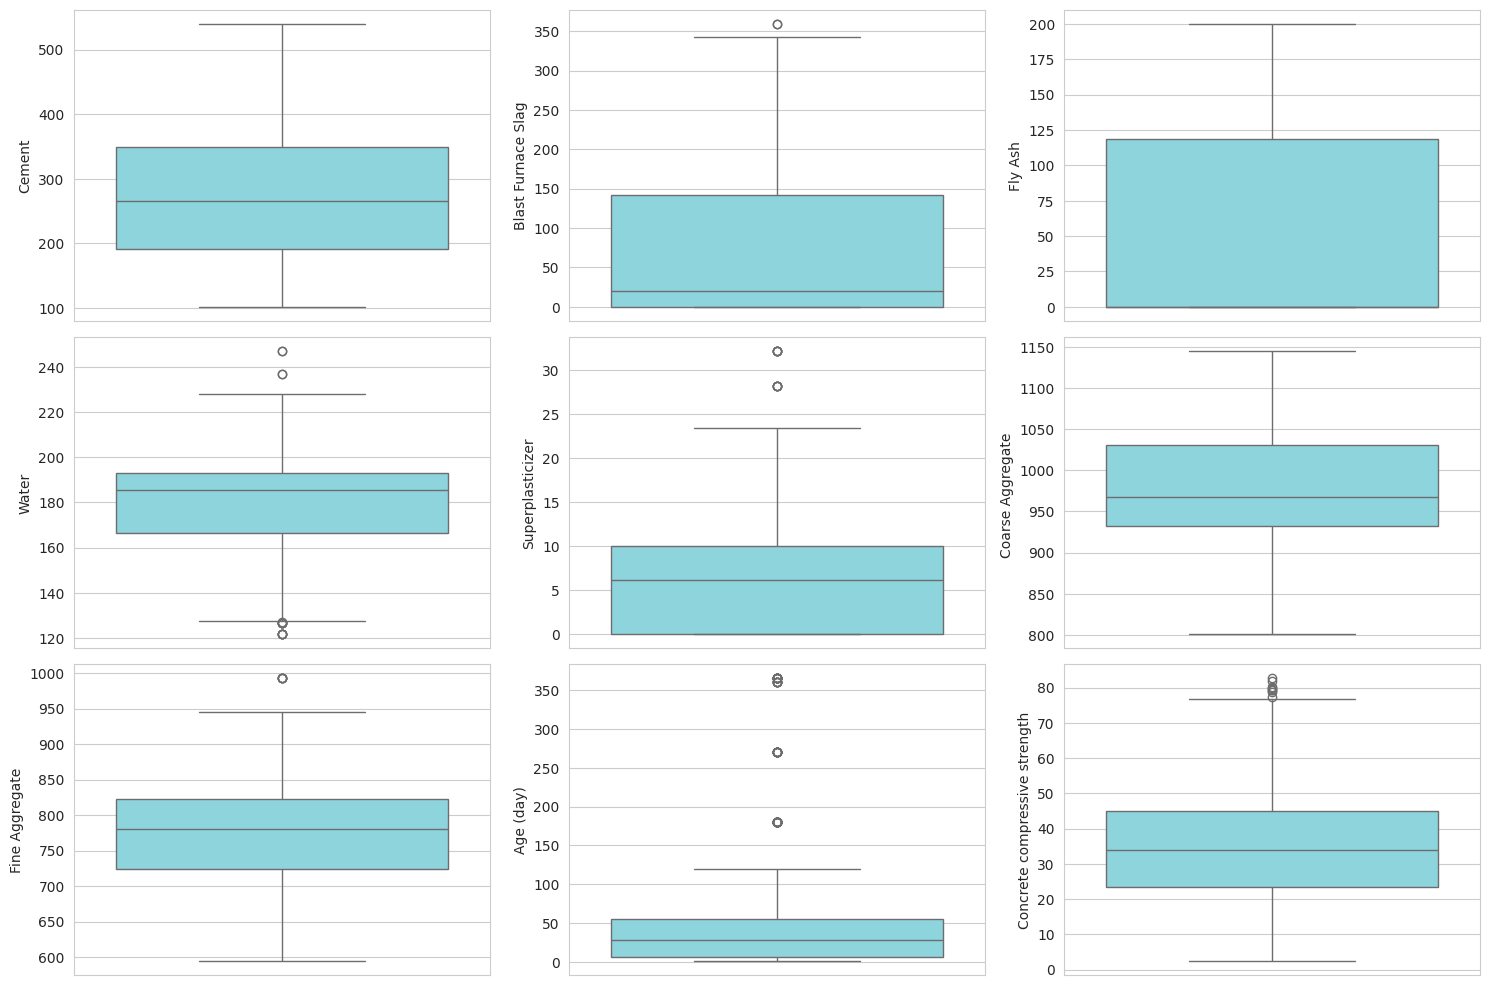

In [ ]:
sns.set_style('whitegrid')
colors = ['#80deea', '#0277bd', '#ff8a65']
sns.set_palette(sns.color_palette(colors))

OrderedCols = np.concatenate([df.select_dtypes(exclude='object').columns.values,
                              df.select_dtypes(include='object').columns.values])

# Calculate the number of rows and columns needed for the subplots
n_cols = 3
n_rows = (len(OrderedCols) + n_cols - 1) // n_cols  # Round up to ensure enough rows

fig, ax = plt.subplots(n_rows, n_cols, figsize=(15, 10), dpi=100)

for i, col in enumerate(OrderedCols):
    x = i // n_cols
    y = i % n_cols

    sns.boxplot(data=df, y=col, ax=ax[x, y])
    ax[x, y].yaxis.label.set_size(10)

# Hide any unused subplots
for j in range(i + 1, n_rows * n_cols):
    fig.delaxes(ax.flatten()[j])

plt.tight_layout()
plt.savefig('boxplot.png')
plt.show()

## 2.3 Linearity Check

### 2.3.1 Scatter plot between numerical features and target variable

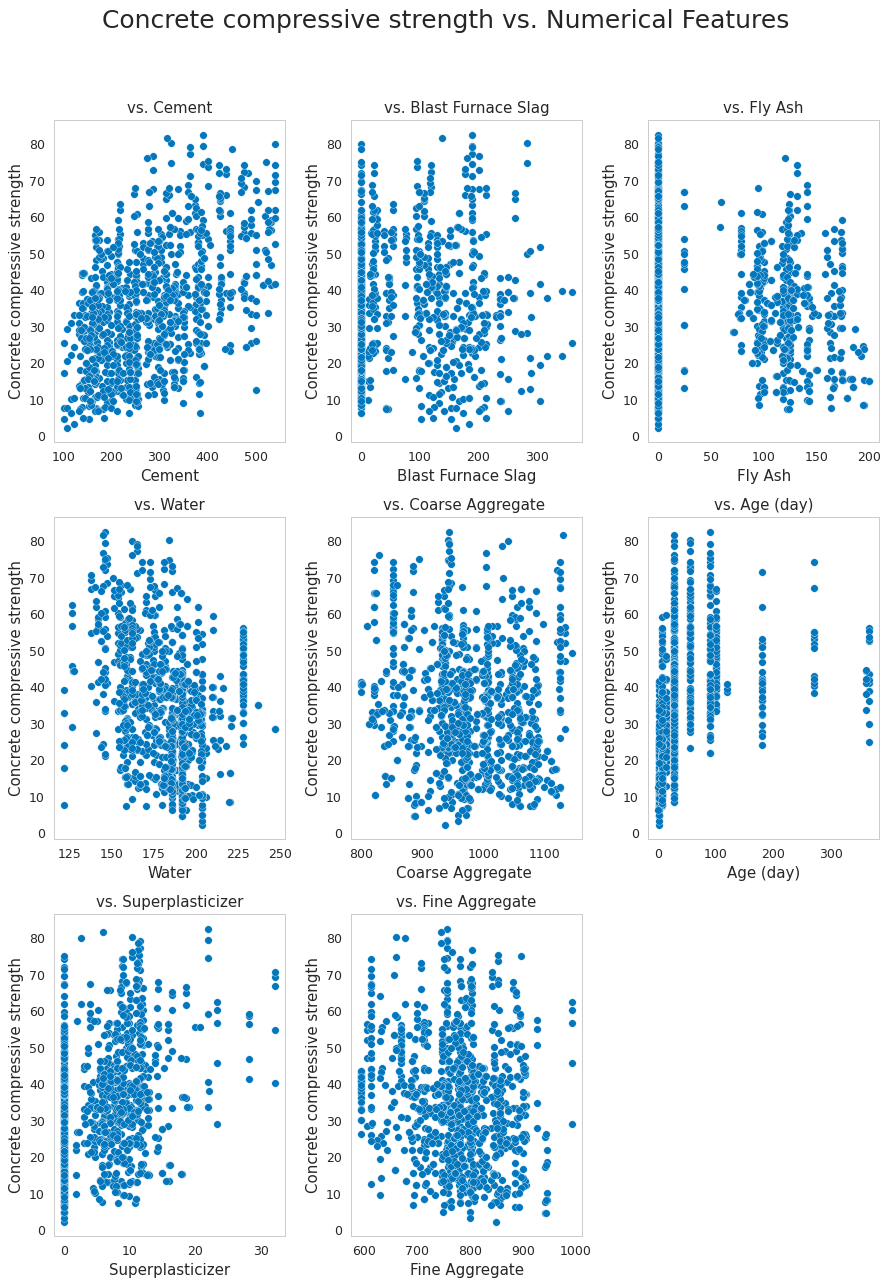

In [ ]:
num_features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Coarse Aggregate ','Age (day)','Superplasticizer','Fine Aggregate']
target = 'Concrete compressive strength'
c = '#0277bd'

# Set up for a 3x3 grid
num_rows, num_cols = 3, 3

fig, ax = plt.subplots(nrows=num_rows, ncols=num_cols, figsize=(10, 5*num_rows), dpi=90)

# Flatten the ax array for easier indexing
ax_flat = ax.flatten()

for i, feature in enumerate(num_features):
    ax_flat[i].scatter(df[feature], df[target], color=c, edgecolors='w', linewidths=0.25)
    ax_flat[i].set_title(f'vs. {feature}', size=12)
    ax_flat[i].set_xlabel(feature, size=12)
    ax_flat[i].set_ylabel(target, size=12)
    ax_flat[i].grid()

# Remove the unused subplot(s)
for j in range(i + 1, num_rows*num_cols):
    fig.delaxes(ax_flat[j])

plt.suptitle('Concrete compressive strength vs. Numerical Features', size=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])
plt.savefig('Concrete compressive strength vs. Numerical Features_3x3.png')
plt.show()



1. The relationship between cement and concrete compressive strength seems to have a positive trend, which might be linear or could potentially benefit from a transformation or polynomial term to better capture the relationship.
2. The plots for blast furnace slag and fly ash show some dispersion, but they don't display a clear linear or curvilinear trend, which makes it difficult to assess linearity just from the scatter plot.
3. The relationships with water and coarse aggregate do not seem to show a clear linear trend, with a lot of dispersion. This could suggest that a simple linear model might not be the best fit for these variables

# Diagonstic Test

## 3.1 Multicollinearity issue

### 3.1.1 Correlation matrix

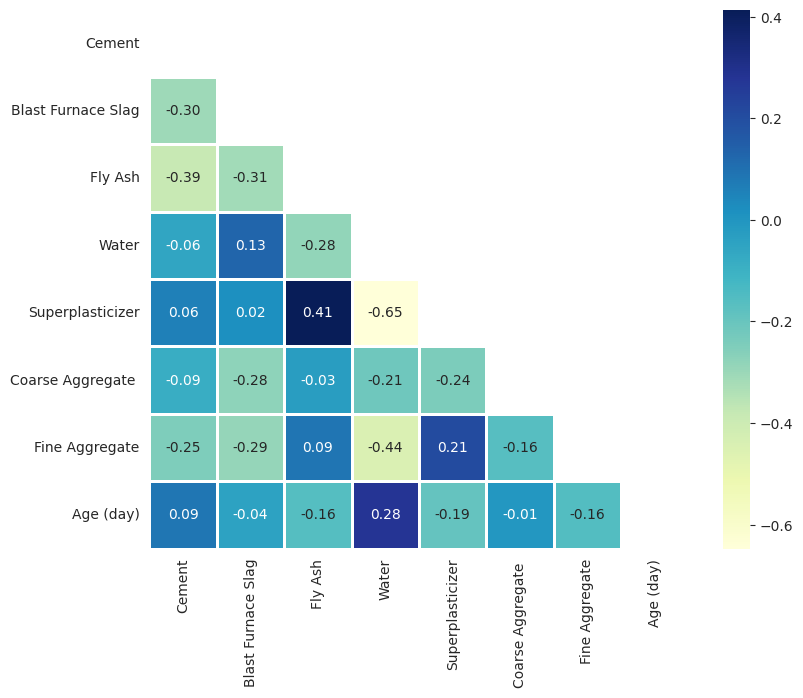

In [ ]:
# Calculate the correlation matrix
# drop dependent variable to only consider correlation within independent variable
df_drop = df.drop(columns = 'Concrete compressive strength')
corr = df_drop.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure with white background style
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    # Draw the heatmap with the mask and correct aspect ratio, using "YlGnBu" colormap
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='0.2f', linewidths=.8, cmap="YlGnBu")

# Save the figure to a file
plt.savefig('correlation_matrix.png')

As you can see from the graph, there are high correlation among

1.   superplasticizer and fly ash
2.   superplasticizer and water
3.   water and fine aggregate




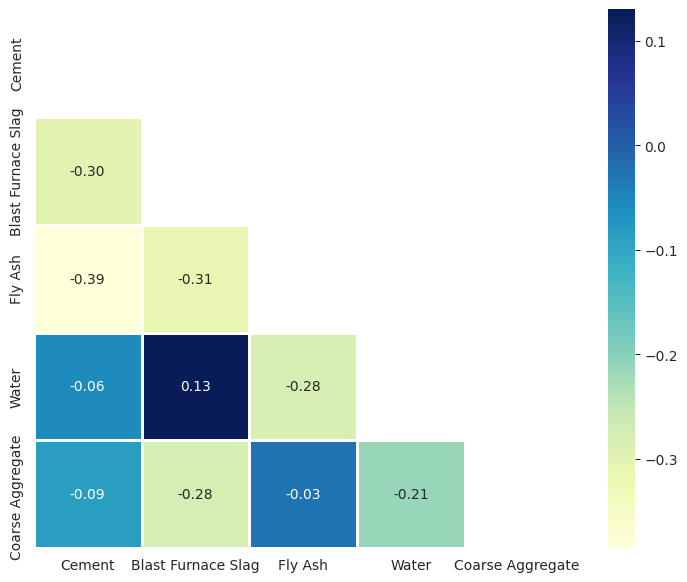

In [ ]:
# Calculate the correlation matrix
# drop dependent variable to only consider correlation within independent variable
df = df.drop(columns = ['Age (day)','Superplasticizer','Fine Aggregate'])
df_drop = df.drop(columns = 'Concrete compressive strength')
corr = df_drop.corr()

# Create a mask for the upper triangle
mask = np.zeros_like(corr)
mask[np.triu_indices_from(mask)] = True

# Set up the matplotlib figure with white background style
with sns.axes_style("white"):
    f, ax = plt.subplots(figsize=(9, 7))
    # Draw the heatmap with the mask and correct aspect ratio, using "YlGnBu" colormap
    ax = sns.heatmap(corr, mask=mask, square=True, annot=True, fmt='0.2f', linewidths=.8, cmap="YlGnBu")

# Save the figure to a file
plt.savefig('correlation_matrix.png')

### 3.1.2 VIF

In [ ]:

X = add_constant(df.drop(columns=['Concrete compressive strength']))

# Create a DataFrame for VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(len(X.columns))]

print(vif_data)

              feature         VIF
0               const  507.485275
1              Cement    1.823340
2  Blast Furnace Slag    1.782544
3             Fly Ash    1.955280
4               Water    1.243435
5   Coarse Aggregate     1.330258


Since VIFs of independent variables are all below 4, there is no multicollinearity issue.

## 3.2 Outlier Handling


### Cook's distance

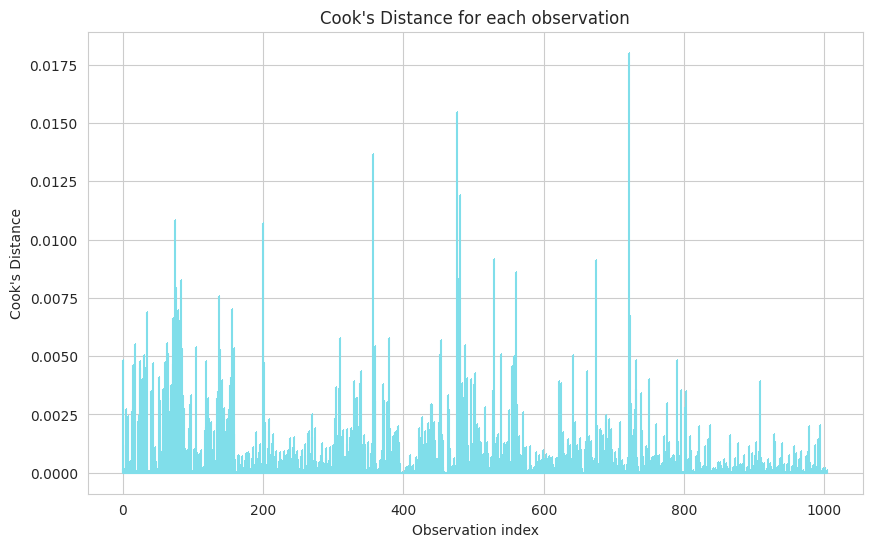

Potential outliers based on Cook's distance: [  0  15  17  24  25  27  30  31  34  43  51  60  61  63  65  71  72  74
  76  77  78  79  82  83  84 105 119 137 139 141 154 156 158 200 201 309
 339 357 359 380 452 453 477 478 480 481 488 490 496 502 529 539 554 557
 560 642 662 675 722 723 732 750 790] number of potential outliers 63
Original DataFrame shape: (1005, 6)
Cleaned DataFrame shape: (942, 6)


In [ ]:
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt

c = '#0277bd'
# Response variable
X = add_constant(df.drop(columns=['Concrete compressive strength']))
y = df['Concrete compressive strength']

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

# Calculate Cook's distance
influence = model.get_influence()
(c, p) = influence.cooks_distance

# Plot Cook's distance
plt.figure(figsize=(10, 6))
plt.stem(np.arange(len(c)), c, markerfmt=",")
plt.title("Cook's Distance for each observation")
plt.xlabel('Observation index')
plt.ylabel("Cook's Distance")
plt.savefig('Cooks.png')
plt.show()

# Identify outliers
n = len(X)
influential_points = np.where(c > 4/n)[0]

print('Potential outliers based on Cook\'s distance:', influential_points, 'number of potential outliers', len(influential_points))
# Store original shape
original_shape = df.shape

# Drop the outliers
df = df.drop(influential_points)

# Show the shape of the original and cleaned dataframes to confirm rows are dropped
print("Original DataFrame shape:", original_shape)
print("Cleaned DataFrame shape:", df.shape)



## Standardization


In [ ]:
from sklearn.preprocessing import StandardScaler
import pandas as pd


def standardize_select_columns(df, exclude_columns):
    # Separate the columns to exclude from the columns to standardize
    columns_to_standardize = df.columns.difference(exclude_columns)
    columns_to_exclude = exclude_columns

    # Standardize the selected columns
    scaler = StandardScaler()
    standardized_data = scaler.fit_transform(df[columns_to_standardize])

    # Convert the scaled data back to a DataFrame
    standardized_df = pd.DataFrame(standardized_data, index=df.index, columns=columns_to_standardize)

    # Combine the standardized columns with the untouched columns
    final_df = pd.concat([standardized_df, df[columns_to_exclude]], axis=1)

    return final_df

columns_to_exclude = []

# Standardize the DataFrame
df_standardized = standardize_select_columns(df, columns_to_exclude)

df = df_standardized
df

,Cement,Blast Furnace Slag,Fly Ash,Water,Coarse Aggregate,Concrete compressive strength
1,2.587102,-0.827070,-0.888961,-0.985430,1.036374,1.739741
2,0.567418,0.880201,-0.888961,2.251557,-0.565583,0.354336
3,0.567418,0.880201,-0.888961,2.251557,-0.565583,0.404531
4,-0.735886,0.759195,-0.888961,0.485928,0.038733,0.612382
5,-0.079854,0.538747,-0.888961,2.251557,-0.565583,0.787579
...,...,...,...,...,...,...
1000,0.021374,0.562709,0.513432,-0.122233,-1.371771,0.611631
1001,0.467164,-0.827070,0.906350,0.682109,-2.051626,-0.228255
1002,-1.223530,0.843061,0.797637,0.520260,-1.081335,-0.707760
1003,-1.120356,1.409755,-0.888961,-0.318414,0.184602,-0.126406


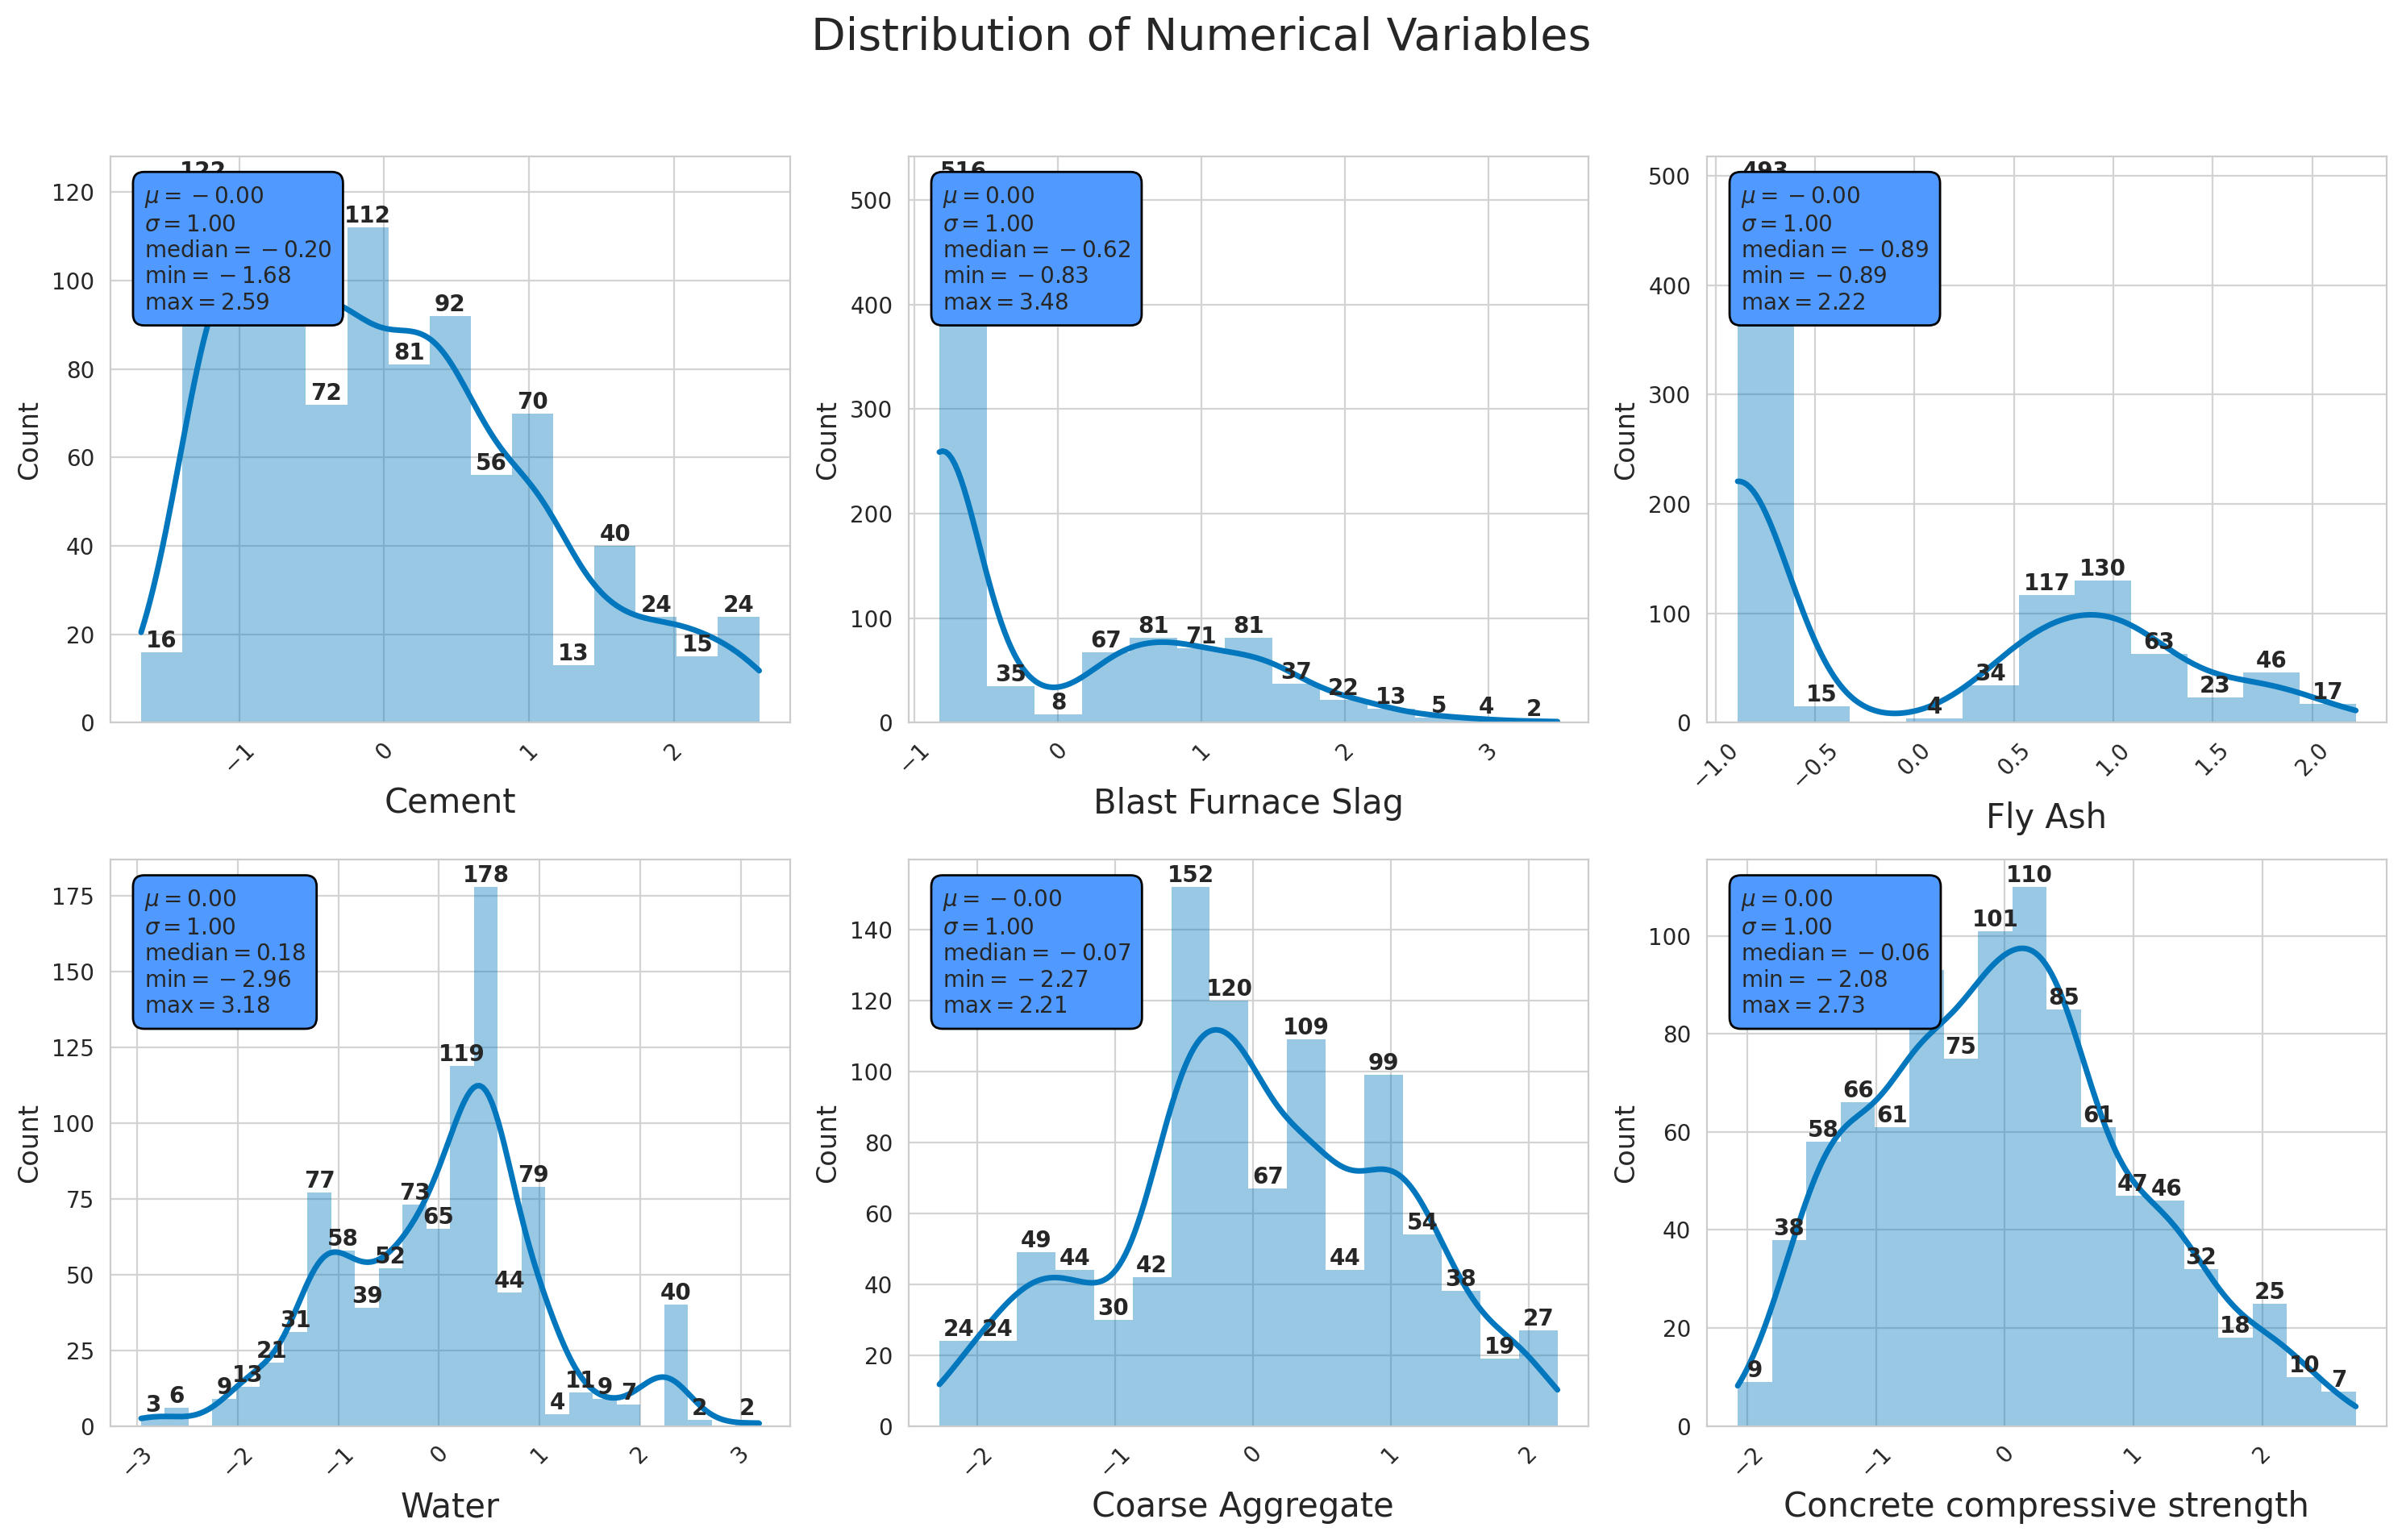

In [ ]:

NumCols_clean = df.select_dtypes(include=np.number).columns
# Calculate the required number of rows and columns for the subplot grid
num_columns_clean = len(NumCols_clean)
num_rows_clean = num_columns_clean // 3 + (num_columns_clean % 3 > 0)  # Ensure we have enough rows

fig, ax = plt.subplots(nrows=num_rows_clean, ncols=3, figsize=(15, num_rows_clean * 5), dpi=200)  # Adjust figure size based on rows

for i in range(len(NumCols_clean)):
    row = i // 3
    col = i % 3
    graph = sns.histplot(data=df, x=NumCols_clean[i], kde=True, ax=ax[row, col] if num_rows_clean > 1 else ax[col],
                         edgecolor='none',  alpha=0.4, line_kws={'lw': 2.5},color = '#0277bd')
    ax[row, col if num_rows_clean > 1 else col].set_xlabel(NumCols_clean[i], fontsize=15)
    ax[row, col if num_rows_clean > 1 else col].set_ylabel('Count', fontsize=12)
    ax[row, col if num_rows_clean > 1 else col].tick_params(axis='x', rotation=45)
    ax[row, col if num_rows_clean > 1 else col].grid(color='lightgrey')

    # Adjusting annotation to avoid overlap and ensure visibility
    for j, p in enumerate(graph.patches):
        height = p.get_height()
        if height > 0:  # Annotating non-zero bars
            ax[row, col if num_rows_clean > 1 else col].annotate(f'{int(height)}', (p.get_x() + p.get_width() / 2, height),
                                  ha='center', fontsize=10, fontweight="bold", verticalalignment='bottom')

    # Adding summary statistics text box
    textstr = '\n'.join((
        r'$\mu=%.2f$' % df[NumCols_clean[i]].mean(),
        r'$\sigma=%.2f$' % df[NumCols_clean[i]].std(),
        r'$\mathrm{median}=%.2f$' % np.median(df[NumCols_clean[i]]),
        r'$\mathrm{min}=%.2f$' % df[NumCols_clean[i]].min(),
        r'$\mathrm{max}=%.2f$' % df[NumCols_clean[i]].max()
    ))
    ax[row, col if num_rows_clean > 1 else col].text(0.05, 0.95, textstr, transform=ax[row, col if num_rows_clean > 1 else col].transAxes, fontsize=10,
                      verticalalignment='top', bbox=dict(boxstyle='round', facecolor='#509aff',
                                                         edgecolor='black', pad=0.5))

# Adjust for an uneven number of plots
if len(NumCols_clean) % 3:
    for i in range(3 - len(NumCols_clean) % 3):  # Turn off remaining axes in the last row
        ax[num_rows_clean-1, 2 - i if num_rows_clean > 1 else 2 - i].axis('off')

plt.suptitle('Distribution of Numerical Variables', fontsize=20)
plt.tight_layout(rect=[0, 0.03, 1, 0.95])  # Adjust layout to fit the suptitle
plt.savefig('Distribution of Numerical Variables.png', dpi=300)
plt.show()


## Refit the model

In [ ]:
X = add_constant(df.drop(columns=['Concrete compressive strength']))
y = df['Concrete compressive strength']

# Fit the ordinary least squares (OLS) model
model = sm.OLS(y, X).fit()

## 3.3 Lineaity check, and possible transformationsto non-linear variable


### 3.3.1 Residuals vs. Fitted Plot

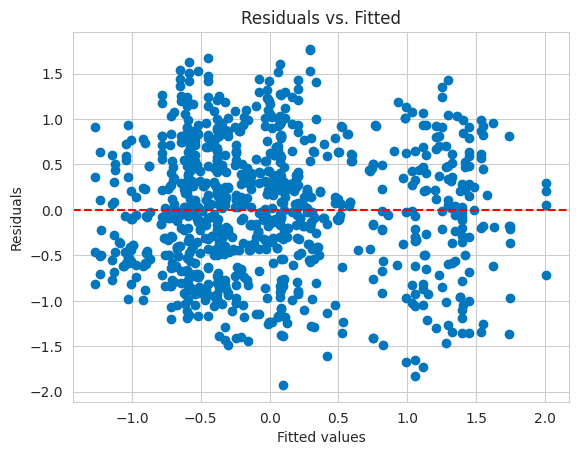

In [ ]:
residuals = model.resid

fitted_values = model.predict(X)
plt.scatter(fitted_values, residuals, c='#0277bd')
plt.axhline(0, color='red', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs. Fitted')
plt.savefig('Residuals vs. Fitted.png')
plt.show()


There is no discernible pattern or trend in these plots, which suggest the relationship is linear

### 3.3.2 Obsered vs. Fitted Values

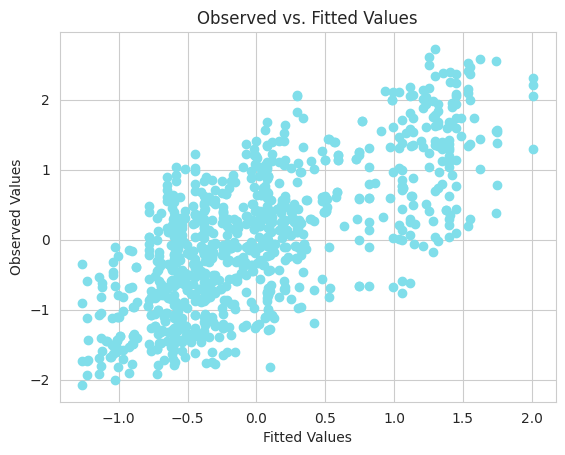

In [ ]:
predicted_values = model.predict(X)
residuals = model.resid

# Scatter plot of observed vs predicted values
plt.scatter(predicted_values, y)
plt.title('Observed vs. Fitted Values')
plt.xlabel('Fitted Values')
plt.ylabel('Observed Values')
plt.savefig('Observed vs. Fitted Values.png')
plt.show()


Points fall along the 45-degress line, which suggest the model might be a good fit

### 3.3.3 Residuals vs. Independent Variables Plots

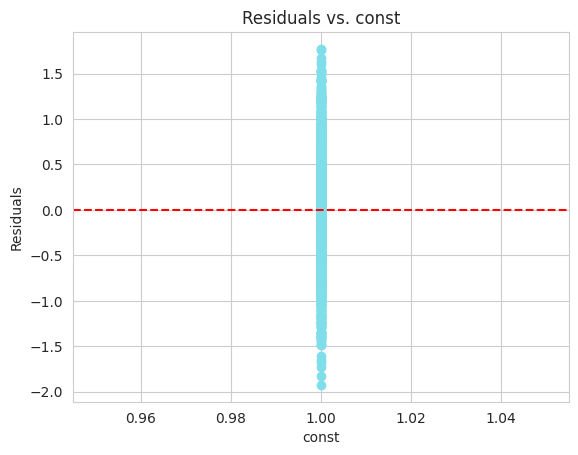

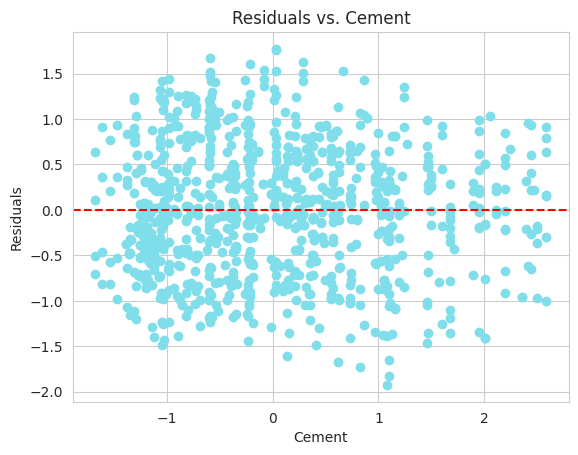

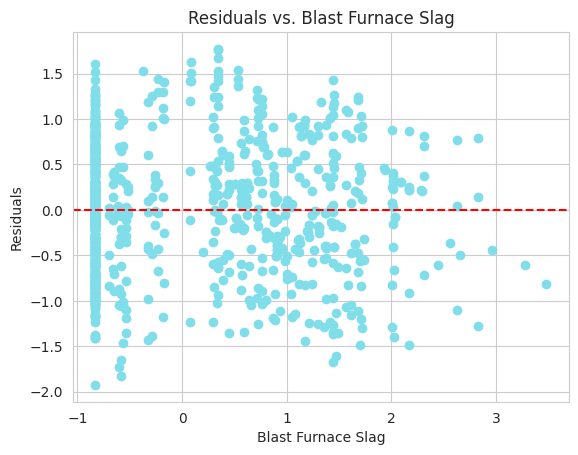

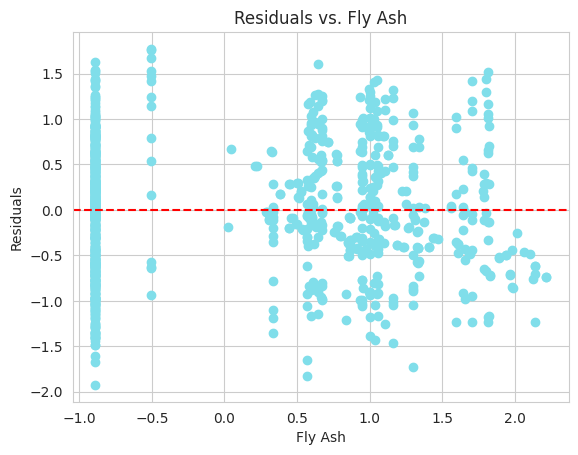

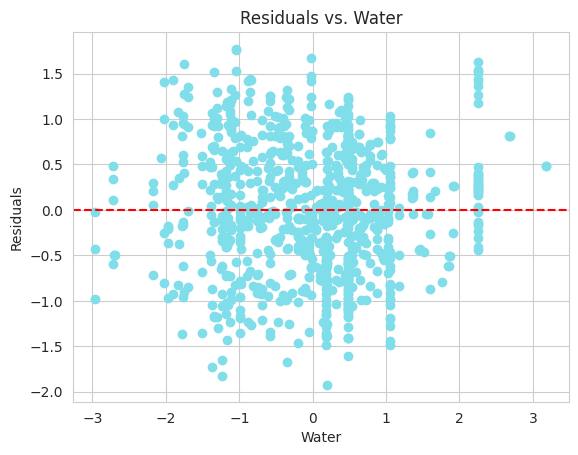

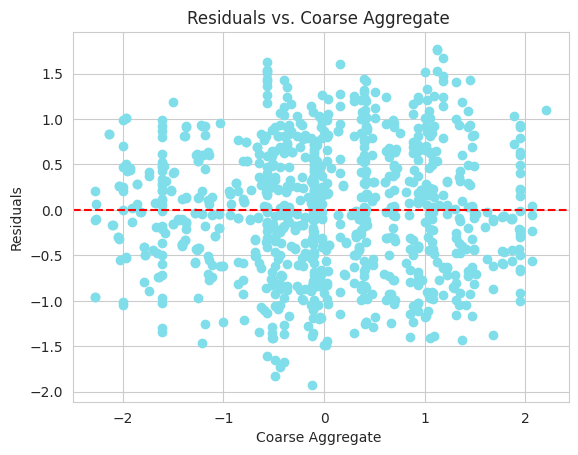

In [ ]:
# Plot residuals against each independent variable
for column in X.columns:
    plt.scatter(X[column], residuals)
    plt.title(f'Residuals vs. {column}')
    plt.xlabel(column)
    plt.ylabel('Residuals')
    plt.axhline(0, linestyle='--', color='red')
    plt.show()


These are similar to the residuals vs. predicted values plot, but they plot the residuals against each individual independent variable. There is no discernible pattern or trend in these plots if the relationship is linear.

### 3.3.4 Rainbow test for linearity

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

rainbow_stat, rainbow_p_value = linear_rainbow(model)
print(f'Rainbow stat: {rainbow_stat}, p-value: {rainbow_p_value}')


Rainbow stat: 0.8035033377888634, p-value: 0.990948076783932


p value is larger then 0.5, we do not reject null hypothesis, which suggest linearity is satisfied.

## 3.4 Homoscedasticity

### 3.4.1 Plot

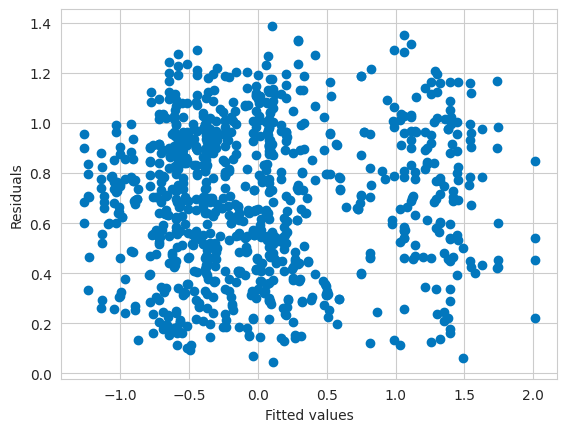

In [ ]:
plt.scatter(fitted_values, np.sqrt(np.abs(residuals)),c='#0277bd' )
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.savefig('Homoscedasticity')
plt.show()

### 3.4.2 Test for Homoscedasticity (Breusch-Pagan Test):

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals, model.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 32.18319425779147, 'p-value': 5.4650377668285805e-06, 'f-value': 6.621875884281733, 'f p-value': 4.540561320346093e-06}


Both the Lagrange Multiplier p-value and the F p-value are extremely low (far below the common alpha level of 0.05). This indicates strong evidence against the null hypothesis of the Breusch-Pagan test, which means that the variance of the residuals is not constant **(heteroscedasticity)**.


## 3.5 Autocorrelation


### 3.5.1 Durbin-waston test

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson

residuals = model.resid

# Perform Durbin-Watson test
dw_statistic = durbin_watson(residuals)

print(f'Durbin-Watson Statistic: {dw_statistic}')
# Generally, a value close to 2 indicates very little autocorrelation


Durbin-Watson Statistic: 1.429626500918293


 DW statistic of 1.4296 is substantially below 2, which suggests that **there is positive autocorrelation** in the residuals

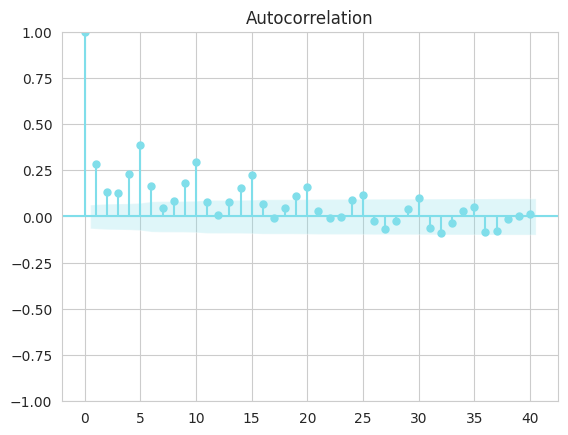

In [ ]:
import statsmodels.tsa.api as smt

# Check for autocorrelation
fig = smt.graphics.plot_acf(model.resid, lags=40, alpha=0.05)
plt.show()


## 3.6 Normality

### 3.61 Normal Q-Q Plot

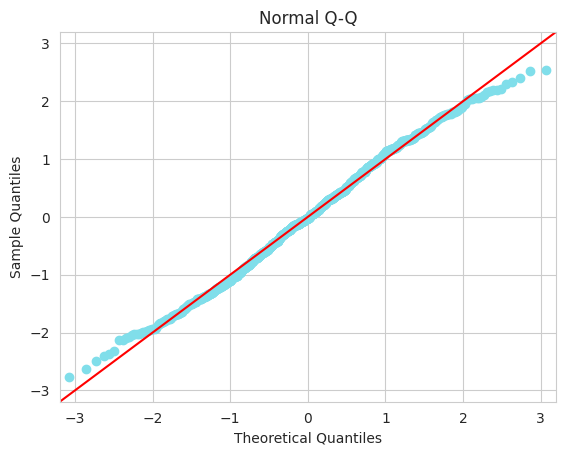

In [ ]:
fig = sm.qqplot(residuals, line='45', fit=True, dist=stats.norm)
plt.title('Normal Q-Q')
plt.savefig('Normal Q-Q.png')
plt.show()


### 3.6.2 Tets for normality(Jarque-Bera Test)

In [ ]:
from scipy.stats import shapiro

stat, p_value = shapiro(residuals)
print('Shapiro-Wilk Test p-value:', p_value)


Shapiro-Wilk Test p-value: 0.0014771722489967942


In [ ]:
import scipy.stats as stats

jb_stat, jb_p_value = stats.jarque_bera(residuals)
print(f"Jarque-Bera statistic: {jb_stat}")
print(f"p-value: {jb_p_value}")

Jarque-Bera statistic: 11.574805387025512
p-value: 0.0030659350168792416


**p value less than 0.05, suggesting residual are not normally distributed**

# Variable transformation


## 4.1 Box-Cox transformation

In [ ]:
from scipy.stats import boxcox
features = ['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Coarse Aggregate ']

df_transformed = df.copy()
# Apply Box-Cox transformation
for feature in features:
   #Adding a small positive value to avoid issues with zero values
   df_transformed[feature], _ = boxcox(df_transformed[feature] + 5)


## 4.2 Check normality after transformation

In [ ]:
from scipy.stats import shapiro
X_transformed = df_transformed[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Coarse Aggregate ']]
X_transformed = sm.add_constant(X_transformed)
y_transformed = df_transformed['Concrete compressive strength']
model_trans = sm.OLS(y_transformed,X_transformed).fit()
residuals_trans = model_trans.resid
stat, p_value = shapiro(residuals_trans)
print('Shapiro-Wilk Test p-value:', p_value)

import scipy.stats as stats

jb_stat, jb_p_value = stats.jarque_bera(residuals_trans)
print(f"Jarque-Bera statistic: {jb_stat}")
print(f"p-value: {jb_p_value}")

Shapiro-Wilk Test p-value: 3.070024831686169e-05
Jarque-Bera statistic: 13.540486672677558
p-value: 0.001147415409063261


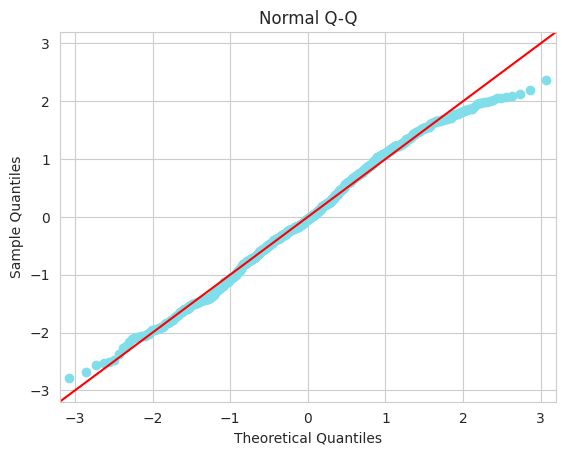

In [ ]:
fig = sm.qqplot(residuals_trans, line='45', fit=True, dist=stats.norm)
plt.title('Normal Q-Q')
plt.savefig('Normal Q-Q.png')
plt.show()


## 4.3 Check linearity after transformation

In [ ]:
from statsmodels.stats.diagnostic import linear_rainbow

rainbow_stat, rainbow_p_value = linear_rainbow(model_trans)
print(f'Rainbow stat: {rainbow_stat}, p-value: {rainbow_p_value}')


Rainbow stat: 0.7220635308384011, p-value: 0.9997793687385216


linearity improved

## 4.4 Check Homoscedasticity

In [ ]:
from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(residuals_trans, model_trans.model.exog)
labels = ['Lagrange multiplier statistic', 'p-value', 'f-value', 'f p-value']
print(dict(zip(labels, bp_test)))


{'Lagrange multiplier statistic': 58.80323572039752, 'p-value': 2.1474486477543484e-11, 'f-value': 12.463774972995148, 'f p-value': 9.914214957813756e-12}


## 4.5 Check autocorrelation

In [ ]:
import statsmodels.api as sm
from statsmodels.stats.stattools import durbin_watson


# Perform Durbin-Watson test
dw_statistic = durbin_watson(residuals_trans)

print(f'Durbin-Watson Statistic: {dw_statistic}')
# Generally, a value close to 2 indicates very little autocorrelation


Durbin-Watson Statistic: 1.4576596909097412


## Check multicollinearity

In [ ]:
# Create a DataFrame for VIFs
vif_data = pd.DataFrame()
vif_data["feature"] = X_transformed.columns

# Calculate VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(X_transformed.values, i) for i in range(len(X_transformed.columns))]

print(vif_data)

              feature            VIF
0               const  149741.891678
1              Cement       1.751708
2  Blast Furnace Slag       1.768591
3             Fly Ash       1.832731
4               Water       1.256911
5   Coarse Aggregate        1.375481


# Fit regression models



## OLS

In [ ]:
import statsmodels.api as sm

X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Coarse Aggregate ']]
X = sm.add_constant(X)
Y = df['Concrete compressive strength']
model_ols = sm.OLS(Y, X).fit()
print("OLS Results:")
print(model_ols.summary())

from statsmodels.stats.stattools import jarque_bera

jb_test = jarque_bera(model_ols.resid)
print("Jarque-Bera test statistics:", jb_test[0])
print("Jarque-Bera test p-value:", jb_test[1])
print("Skew:", jb_test[2])
print("Kurtosis:", jb_test[3])

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_ols.resid, model_ols.model.exog)
print("BP test statistic:", bp_test[0])
print("BP test p-value:", bp_test[1])
print("F-statistic of the hypothesis that the error variance does not depend on x:", bp_test[2])
print("F-test p-value:", bp_test[3])

from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(model_ols.resid)
print("Durbin-Watson statistic:", dw_statistic)

OLS Results:
                                  OLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.514
Model:                                       OLS   Adj. R-squared:                  0.512
Method:                            Least Squares   F-statistic:                     198.4
Date:                           Tue, 07 May 2024   Prob (F-statistic):          4.01e-144
Time:                                   23:53:06   Log-Likelihood:                -996.34
No. Observations:                            942   AIC:                             2005.
Df Residuals:                                936   BIC:                             2034.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]


## WLS

In [ ]:
import numpy as np
import pandas as pd
import statsmodels.api as sm
import statsmodels.formula.api as smf
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Coarse Aggregate ']]
X = sm.add_constant(X)
Y = df['Concrete compressive strength']
# Get the standard errors of the predictions
predictions = model_ols.get_prediction(X)
pred_summary_frame = predictions.summary_frame()
standard_errors = pred_summary_frame['mean_se']

# Compute the weights as the inverse of the variance
weights = 1 / (standard_errors ** 2)

# same independent & dependent variables as above

# Fit WLS model
model_wls = sm.WLS(Y, X, weights=weights).fit()

# Get the summary of the model
print(model_wls.summary())

jb_test = jarque_bera(model_wls.resid)
print("Jarque-Bera test statistics:", jb_test[0])
print("Jarque-Bera test p-value:", jb_test[1])
print("Skew:", jb_test[2])
print("Kurtosis:", jb_test[3])

bp_test = het_breuschpagan(model_wls.resid, model_wls.model.exog)
print("BP test statistic:", bp_test[0])
print("BP test p-value:", bp_test[1])
print("F-statistic of the hypothesis that the error variance does not depend on x:", bp_test[2])
print("F-test p-value:", bp_test[3])

dw_statistic = durbin_watson(model_wls.resid)
print("Durbin-Watson statistic:", dw_statistic)

                                  WLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.422
Model:                                       WLS   Adj. R-squared:                  0.419
Method:                            Least Squares   F-statistic:                     136.8
Date:                           Tue, 07 May 2024   Prob (F-statistic):          6.45e-109
Time:                                   23:53:06   Log-Likelihood:                -1054.2
No. Observations:                            942   AIC:                             2120.
Df Residuals:                                936   BIC:                             2149.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]
-------------

## GLS

In [ ]:
import statsmodels.api as sm

X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Coarse Aggregate ']]
X = sm.add_constant(X)
Y = df['Concrete compressive strength']
residuals = model_ols.resid

from statsmodels.tsa.stattools import acf
rho = acf(residuals, nlags=1)[1]

from scipy.linalg import toeplitz
order = np.arange(len(residuals))
omega_matrix = rho**toeplitz(order, order)

# Fit GLS model with the constructed Omega matrix
model_gls = sm.GLS(Y, X, sigma=omega_matrix).fit()
print("\nGLS Results:")
print(model_gls.summary())

from statsmodels.stats.stattools import jarque_bera

jb_test = jarque_bera(model_gls.resid)
print("Jarque-Bera test statistics:", jb_test[0])
print("Jarque-Bera test p-value:", jb_test[1])
print("Skew:", jb_test[2])
print("Kurtosis:", jb_test[3])

from statsmodels.stats.diagnostic import het_breuschpagan

bp_test = het_breuschpagan(model_gls.resid, model_gls.model.exog)
print("BP test statistic:", bp_test[0])
print("BP test p-value:", bp_test[1])
print("F-statistic of the hypothesis that the error variance does not depend on x:", bp_test[2])
print("F-test p-value:", bp_test[3])

from statsmodels.stats.stattools import durbin_watson

dw_statistic = durbin_watson(model_gls.resid)
print("Durbin-Watson statistic:", dw_statistic)


GLS Results:
                                  GLS Regression Results                                 
Dep. Variable:     Concrete compressive strength   R-squared:                       0.439
Model:                                       GLS   Adj. R-squared:                  0.436
Method:                            Least Squares   F-statistic:                     146.3
Date:                           Tue, 07 May 2024   Prob (F-statistic):          1.00e-114
Time:                                   23:53:07   Log-Likelihood:                -955.00
No. Observations:                            942   AIC:                             1922.
Df Residuals:                                936   BIC:                             1951.
Df Model:                                      5                                         
Covariance Type:                       nonrobust                                         
                         coef    std err          t      P>|t|      [0.025      0.975]

Since our model is heteroskedastic and auto-correlated, we used the squared residuals from the OLS model to estimate the variance for each observation, and used the residuals to estimate autocorrelation parameters by fitting an autoregressive model to the residuals. We combined these estimates to construct the full covariance matrix, Omega.

### OLS,WLS,GLS diagnostics

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import matplotlib.pyplot as plt
from statsmodels.stats.diagnostic import het_white
from statsmodels.stats.stattools import durbin_watson, jarque_bera
from sklearn.linear_model import Lasso, Ridge, ElasticNet
from sklearn.model_selection import train_test_split
from sklearn.metrics import r2_score, mean_squared_error, mean_absolute_error
from sklearn.preprocessing import StandardScaler
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Define independent and dependent variables
X = df[['Cement', 'Blast Furnace Slag', 'Fly Ash', 'Water', 'Coarse Aggregate ']]
y = df['Concrete compressive strength']

# Add a constant to the model
X_sm = sm.add_constant(X)

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
def regression_diagnostics(model, y_true, y_pred, X):
    # Jarque-Bera Test
    jb_test_stat, jb_p_value, _, _ = jarque_bera(model.resid)

    # White Test for homoskedasticity
    _, white_p_value, _, _ = het_white(model.resid, model.model.exog)

    # Durbin-Watson Statistic
    dw_stat = durbin_watson(model.resid)

    # Breusch-Pagan Test
    _, bp_p_value, _, _ = het_breuschpagan(model.resid, model.model.exog)

    # VIF
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
    vif["Features"] = X.columns

    # RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_true, y_pred))
    mae = mean_absolute_error(y_true, y_pred)

    # R-squared and Adjusted R-squared
    r_squared = model.rsquared
    adj_r_squared = model.rsquared_adj

    print(f"Jarque-Bera p-value: {jb_p_value}")
    print(f"White test p-value: {white_p_value}")
    print(f"Durbin-Watson statistic: {dw_stat}")
    print(f"Breusch-Pagan test p-value: {bp_p_value}")
    print(vif)
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r_squared}")
    print(f"Adjusted R-squared: {adj_r_squared}")


In [ ]:
# Ordinary Least Squares (OLS)
ols_pred = model_ols.predict(X_sm)

# Diagnostics and Metrics for OLS
print("OLS Regression Diagnostics and Metrics:")
regression_diagnostics(model_ols, y, ols_pred, X_sm)


# Fit the WLS model using the computed weights
wls_predictions = model_wls.predict(X_sm)
print("\nWLS Regression Diagnostics and Metrics:")
regression_diagnostics(model_wls, y, wls_predictions, X_sm)

# Fit the GLS model

# Predictions for diagnostics
gls_predictions = model_gls.predict(X_sm)
print("\nGLS Regression Diagnostics and Metrics:")
regression_diagnostics(model_gls, y, gls_predictions, X_sm)

OLS Regression Diagnostics and Metrics:
Jarque-Bera p-value: 0.0030659350168792416
White test p-value: 4.411821913285575e-11
Durbin-Watson statistic: 1.429626500918293
Breusch-Pagan test p-value: 5.4650377668285805e-06
   VIF Factor            Features
0    1.000000               const
1    1.858780              Cement
2    1.789305  Blast Furnace Slag
3    1.961963             Fly Ash
4    1.247494               Water
5    1.344384   Coarse Aggregate 
RMSE: 0.6968034579516668
MAE: 0.5680201193420801
R-squared: 0.5144649409865999
Adjusted R-squared: 0.5118712707995625

WLS Regression Diagnostics and Metrics:
Jarque-Bera p-value: 0.0014912174203392827
White test p-value: 1.6133674809725736e-10
Durbin-Watson statistic: 1.437141208775671
Breusch-Pagan test p-value: 3.20795803344093e-05
   VIF Factor            Features
0    1.000000               const
1    1.858780              Cement
2    1.789305  Blast Furnace Slag
3    1.961963             Fly Ash
4    1.247494               Water
5 

## Ridge, Lasso and Elastic Net

In [ ]:
def regression_diagnostics_sklearn(model, X_train, y_train, X_test, y_test, X_sm):
    # Predictions for diagnostics
    y_pred = model.predict(X_test)

    # Jarque-Bera Test
    residuals = y_test - y_pred
    jb_test_stat, jb_p_value, _, _ = jarque_bera(residuals)

    # Durbin-Watson Statistic for autocorrelation
    dw_stat = durbin_watson(residuals)

    # Breusch-Pagan Test
    _, bp_p_value, _, _ = het_breuschpagan(residuals, sm.add_constant(X_test))

    # VIF (on non-scaled features with constant)
    vif = pd.DataFrame()
    vif["VIF Factor"] = [variance_inflation_factor(X_sm.values, i) for i in range(X_sm.shape[1])]
    vif["Features"] = X_sm.columns

    # RMSE and MAE
    rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    mae = mean_absolute_error(y_test, y_pred)

    # R-squared and Adjusted R-squared
    r_squared = r2_score(y_test, y_pred)
    n = X_test.shape[0]
    p = X_test.shape[1]
    adj_r_squared = 1 - (1 - r_squared) * (n - 1) / (n - p - 1)

    # Output
    print(f"Jarque-Bera p-value: {jb_p_value}")
    print(f"Durbin-Watson statistic: {dw_stat}")
    print(f"Breusch-Pagan p-value: {bp_p_value}")
    print(vif)  # Exclude the 'const' term for VIF display
    print(f"RMSE: {rmse}")
    print(f"MAE: {mae}")
    print(f"R-squared: {r_squared}")
    print(f"Adjusted R-squared: {adj_r_squared}")


In [ ]:
from sklearn.linear_model import RidgeCV
import numpy as np

# Define a range of alpha values for Ridge regression
alphas = np.logspace(-6, 6, 200)  # Creates 200 values from 10^-6 to 10^6

# Initialize RidgeCV with specified alphas and cross-validation strategy
ridge_cv = RidgeCV(alphas=alphas, store_cv_values=True)
ridge_cv.fit(X_train, y_train)

# Optimal alpha
print("Optimal alpha for Ridge:", ridge_cv.alpha_)

Optimal alpha for Ridge: 0.9329304026284677


In [ ]:
from sklearn.linear_model import LassoCV

# Define a range of alpha values for Lasso regression
lasso_cv = LassoCV(alphas=alphas, cv=5, random_state=42)
lasso_cv.fit(X_train, y_train)

# Optimal alpha
print("Optimal alpha for Lasso:", lasso_cv.alpha_)

Optimal alpha for Lasso: 0.0018041864093920718


In [ ]:
from sklearn.linear_model import ElasticNetCV

# Define a range of alpha values
alphas = np.logspace(-6, 1, 50)  # 50 alpha values from 10^-6 to 10^1

# Define a range of l1_ratio values from 0 to 1
l1_ratios = np.linspace(0.01, 1, 25)  # Avoiding 0 to ensure some level of L1 penalty

# Initialize ElasticNetCV
elastic_net_cv = ElasticNetCV(alphas=alphas, l1_ratio=l1_ratios, cv=5, random_state=42)

# Fit the model
elastic_net_cv.fit(X_train, y_train)

# Optimal alpha and l1_ratio
optimal_alpha = elastic_net_cv.alpha_
optimal_l1_ratio = elastic_net_cv.l1_ratio_

print("Optimal alpha:", optimal_alpha)
print("Optimal l1_ratio:", optimal_l1_ratio)


Optimal alpha: 0.0019306977288832496
Optimal l1_ratio: 1.0


In [ ]:
def calculate_aic_bic(model, X, y):
    predictions = model.predict(X)
    mse = mean_squared_error(y, predictions)
    n_samples = len(y)
    n_features = np.sum(model.coef_ != 0) + 1  # Number of non-zero coefficients plus the intercept

    aic = n_samples * np.log(mse) + 2 * n_features
    bic = n_samples * np.log(mse) + n_features * np.log(n_samples)

    return aic, bic

# LASSO Model
lasso = Lasso(alpha=lasso_cv.alpha_)
model_lasso = lasso.fit(X_train, y_train)
print("LASSO Regression Diagnostics and Metrics:")
aic_lasso, bic_lasso = calculate_aic_bic(lasso, X_train, y_train)
print(f"AIC: {aic_lasso}, BIC: {bic_lasso}")
regression_diagnostics_sklearn(lasso, X_train, y_train, X_test, y_test, X_sm)

# Ridge Model
ridge = Ridge(alpha=ridge_cv.alpha_)
model_ridge = ridge.fit(X_train, y_train)
print("\nRidge Regression Diagnostics and Metrics:")
aic_ridge, bic_ridge = calculate_aic_bic(ridge, X_train, y_train)
print(f"AIC: {aic_ridge}, BIC: {bic_ridge}")
regression_diagnostics_sklearn(ridge, X_train, y_train, X_test, y_test, X_sm)

# Elastic Net Model
elastic_net = ElasticNet(alpha=optimal_alpha, l1_ratio=optimal_l1_ratio)
model_elastic_net = elastic_net.fit(X_train, y_train)
print("\nElastic Net Regression Diagnostics and Metrics:")
aic_en, bic_en = calculate_aic_bic(elastic_net, X_train, y_train)
print(f"AIC: {aic_en}, BIC: {bic_en}")
regression_diagnostics_sklearn(elastic_net, X_train, y_train, X_test, y_test, X_sm)


LASSO Regression Diagnostics and Metrics:
AIC: -470.5695430328749, BIC: -443.62520182585985
Jarque-Bera p-value: 0.1260976397638856
Durbin-Watson statistic: 1.8212485590065954
Breusch-Pagan p-value: 0.06014405305613311
   VIF Factor            Features
0    1.000000               const
1    1.858780              Cement
2    1.789305  Blast Furnace Slag
3    1.961963             Fly Ash
4    1.247494               Water
5    1.344384   Coarse Aggregate 
RMSE: 0.7068612419062222
MAE: 0.5802707768102271
R-squared: 0.4655415214565112
Adjusted R-squared: 0.45589425650085247

Ridge Regression Diagnostics and Metrics:
AIC: -470.6038078671688, BIC: -443.6594666601538
Jarque-Bera p-value: 0.12678458244404084
Durbin-Watson statistic: 1.8205382618978638
Breusch-Pagan p-value: 0.05963255540883927
   VIF Factor            Features
0    1.000000               const
1    1.858780              Cement
2    1.789305  Blast Furnace Slag
3    1.961963             Fly Ash
4    1.247494               Water
